In [2]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 5)

In [3]:
import errno
import librosa
import matplotlib, matplotlib.pyplot as plt
import numpy
import os
import os.path
import sklearn
import urllib.request

def init():
    plt.style.use('seaborn-muted')
    #plt.rcParams['figure.figsize'] = (14, 5)
    plt.rcParams['axes.grid'] = True
    plt.rcParams['axes.spines.left'] = False
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.bottom'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.xmargin'] = 0
    plt.rcParams['axes.ymargin'] = 0
    plt.rcParams['image.cmap'] = 'gray'
    plt.rcParams['image.interpolation'] = None


def extract_features(signal, features):
    fvs = list()
    for feature_name in features:
        if feature_name == 'zero_crossing_rate':
            fvs.append( librosa.feature.zero_crossing_rate(signal)[0, 0] )
        elif feature_name == 'spectral_centroid':
            fvs.append( librosa.feature.spectral_centroid(signal)[0, 0] )
    return fvs


def get_features(collection='drum_samples_train',
                 features=('zero_crossing_rate', 'spectral_centroid'),
                 scaler=None,
                 download=True):

    if collection == 'drum_samples_train':
        kick_filepaths, snare_filepaths = download_samples('drum_samples_train', download=download)
        kick_signals = [
            librosa.load(p)[0] for p in kick_filepaths
        ]
        snare_signals = [
            librosa.load(p)[0] for p in snare_filepaths
        ]

        kick_features = numpy.array([extract_features(x, features) for x in kick_signals])
        snare_features = numpy.array([extract_features(x, features) for x in snare_signals])
        feature_table = numpy.vstack((kick_features, snare_features))
        if scaler is None:
            scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
            scaler.fit(feature_table)
        training_features = scaler.transform(feature_table)

        kick_labels = numpy.zeros(10)
        snare_labels = numpy.ones(10)
        training_labels = numpy.concatenate((kick_labels, snare_labels))

        return training_features, training_labels, scaler

    elif collection == 'drum_samples_test':
        kick_filepaths, snare_filepaths = download_samples('drum_samples_test', download=download)
        kick_signals = [
            librosa.load(p)[0] for p in kick_filepaths
        ]
        snare_signals = [
            librosa.load(p)[0] for p in snare_filepaths
        ]

        kick_features = numpy.array([extract_features(x, features) for x in kick_signals])
        snare_features = numpy.array([extract_features(x, features) for x in snare_signals])
        feature_table = numpy.vstack((kick_features, snare_features))
        if scaler is None:
            scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
            scaler.fit(feature_table)
        test_features = scaler.transform(feature_table)

        kick_labels = numpy.zeros(30)
        snare_labels = numpy.ones(30)
        labels = numpy.concatenate((kick_labels, snare_labels))

        return test_features, labels, scaler

def download_samples(collection='drum_samples_train', download=True):
    """Download ten kick drum samples and ten snare drum samples.
        `collection`: output directory containing the twenty drum samples
    Returns:
        `kick_filepaths`: list of kick drum filepaths
        `snare_filepaths`: list of snare drum filepaths
    """
    try:
        os.makedirs(collection)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

    if collection == 'drum_samples_train':
        if download:
            for drum_type in ['kick', 'snare']:
                for i in range(1, 11):
                    filename = '%s_%02d.wav' % (drum_type, i)
                    urllib.request.urlretrieve('http://audio.musicinformationretrieval.com/drum_samples/%s' % filename,
                                       filename=os.path.join(collection, filename))
        kick_filepaths = [os.path.join(collection, 'kick_%02d.wav' % i) for i in range(1, 11)]
        snare_filepaths = [os.path.join(collection, 'snare_%02d.wav' % i) for i in range(1, 11)]
        return kick_filepaths, snare_filepaths

    elif collection == 'drum_samples_test':
        if download:
            for drum_type in ['kick', 'snare']:
                for i in range(30):
                    filename = '%s_%02d.wav' % (drum_type, i)
                    urllib.request.urlretrieve('http://audio.musicinformationretrieval.com/drum_samples/test/%s' % filename,
                                       filename=os.path.join(collection, filename))
        kick_filepaths = [os.path.join(collection, 'kick_%02d.wav' % i) for i in range(30)]
        snare_filepaths = [os.path.join(collection, 'snare_%02d.wav' % i) for i in range(30)]
        return kick_filepaths, snare_filepaths

    elif collection == 'violin_samples_train':
        urllib.request.urlretrieve('http://audio.musicinformationretrieval.com/violin_samples_train/list.txt',
                           filename=os.path.join(collection, 'list.txt'))
        for line in open(os.path.join(collection, 'list.txt'), 'r'):
            filename = line.strip()
            print(filename)
            if filename.endswith('.wav'):
                urllib.request.urlretrieve('http://audio.musicinformationretrieval.com/' + filename,
                                   filename=filename)
    return [os.path.join(collection, f) for f in os.listdir(collection)]

[&larr; Back to Index](index.html)

# Principal Component Analysis 

Download a file:

In [8]:
filename = '125BOUNC-mono.WAV'

Load a file:

In [9]:
x, fs = librosa.load(filename)

Listen to the signal:

In [10]:
IPython.display.Audio(x, rate=fs)

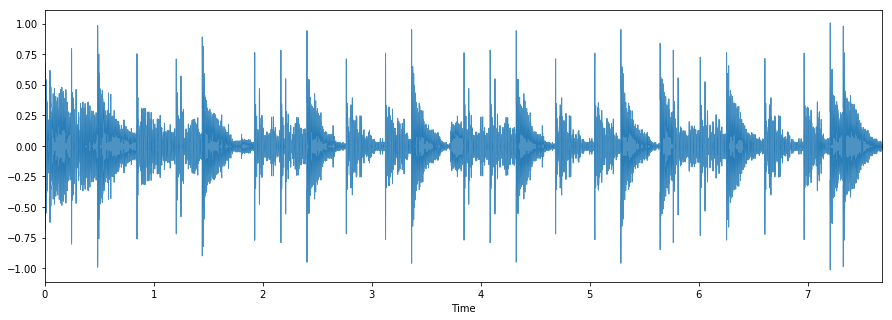

In [25]:

import librosa.display

plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, fs, alpha=0.8)



Text(0.5,0,'Frequency (Hz)')

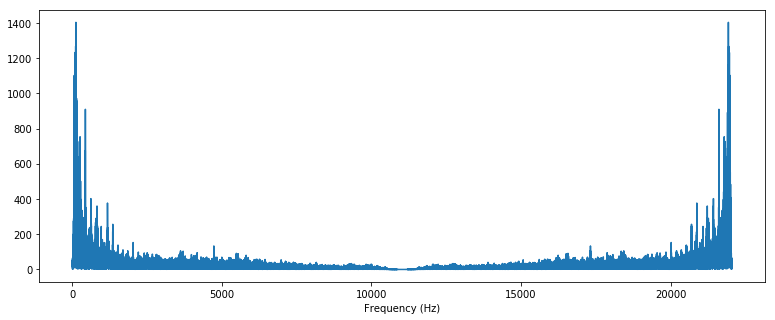

In [33]:
##FFT


XFFT = scipy.fft(x)
X_mag = numpy.absolute(XFFT)
f = numpy.linspace(0, fs, len(X_mag)) # frequency variable


plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')






## Compute some features:

In [26]:
X = librosa.feature.mfcc(x, sr=fs)

In [31]:
X

array([[  -4.3687061 ,   85.09135077,   15.65551814, ...,    0.54258466,
         -14.08977597,    5.12577683],
       [ -13.15362775,   59.0235374 ,   23.13124371, ...,    0.64145354,
          -9.48878251,    5.41146056],
       [ -37.2441555 ,   15.00792114,   41.17385129, ...,    4.71530598,
          -3.95298088,   -0.67582857],
       ...,
       [-209.31204725,   68.88533691,    5.27638669, ...,    4.62120269,
         -12.87864513,  -12.65136834],
       [-230.88375632,   73.75765446,    2.44802165, ...,    3.20587866,
          -9.67841496,   -8.61140057],
       [-259.62259755,   75.32317514,    5.87783126, ...,    0.94232971,
          -7.3564895 ,  -10.5679862 ]])

In [13]:
print (X.shape)

(20, 331)


Scale the features to have zero mean and unit variance:

In [14]:
X = sklearn.preprocessing.scale(X)

In [15]:
X.mean()

-1.2879928744896076e-17

Create a PCA model object.

In [16]:
model = sklearn.decomposition.PCA(n_components=2, whiten=True)

Apply PCA to the scaled features:

In [17]:
model.fit(X.T)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [18]:
Y = model.transform(X.T)

In [20]:
print (Y.shape)

(331, 2)


Let's see how many principal components were returned:

In [21]:
model.components_.shape

(2, 20)

Plot the two top principal components for each data point:

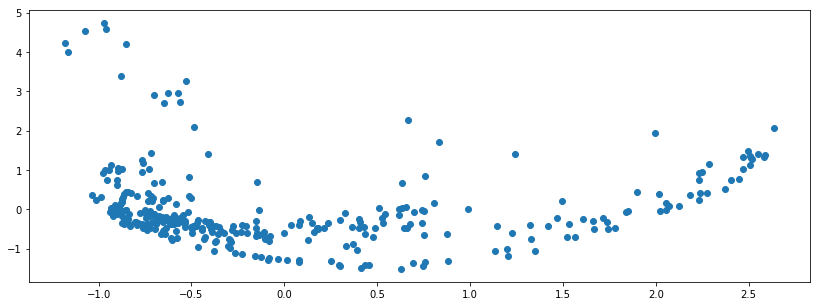

In [22]:
plt.scatter(Y[:,0], Y[:,1])